In [1]:
import sys
sys.path.insert(0, '/10 A KAI 2/Week6/Credit_Scoring/')
import pandas as pd

In [2]:
from Script.WOE import WOEAnalysis

In [3]:
df = pd.read_csv('../Data/data_v2.csv', index_col=0)

In [4]:
df.columns

Index(['CustomerId', 'Frequency', 'MonetaryValue', 'Recency', 'RFMS_Score', 'Total_Credit_Amount', 'Total_Debit_Amount', 'Total_Transaction_amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Total_Unique_Account_Count', 'FraudResult', 'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3',
       'ChannelId_ChannelId_5', 'ProductCategory_airtime', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill',
       'Standard_Deviation_Transaction_Amount', 'RFMS_Score_Standardized', 'CreditRiskLabel'],
      dtype='object')

##### Removing attributes which was used to calaculate the proxy label because it is redendent on the data

In [5]:
df = df.drop(['RFMS_Score', 'Frequency', 'MonetaryValue', 'Recency', 'RFMS_Score_Standardized'], axis=1)

In [6]:
df.columns

Index(['CustomerId', 'Total_Credit_Amount', 'Total_Debit_Amount', 'Total_Transaction_amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Total_Unique_Account_Count', 'FraudResult', 'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5', 'ProductCategory_airtime',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'Standard_Deviation_Transaction_Amount', 'CreditRiskLabel'],
      dtype='object')

In [7]:
woe = WOEAnalysis(df, 'CreditRiskLabel')

In [8]:
woe.woe_num()


Scaled Numerical Features:
   Total_Credit_Amount  Total_Debit_Amount  Total_Transaction_amount  Average_Transaction_Amount  Transaction_Count  Total_Unique_Account_Count  FraudResult  ChannelId_ChannelId_1  ChannelId_ChannelId_2  ChannelId_ChannelId_3  ChannelId_ChannelId_5  ProductCategory_airtime  ProductCategory_data_bundles  \
0            -0.826640            0.377591                 -0.728235                    1.043121          -0.839070                   -1.356587          0.0                    0.0              -0.674625              -0.884094                    0.0                -0.709758                           0.0   
1            -0.826640            0.377591                 -0.728235                    1.043121          -0.839070                   -1.356587          0.0                    0.0              -0.674625              -0.884094                    0.0                -0.709758                           0.0   
2            -0.481362           -0.155651          

{'Total_Credit_Amount': [-0.11416291940514771,
  0.009150351454630406,
  0.2927708744321206,
  0.6188659684835343,
  0.8271283814911597,
  2.0616312375429406,
  2.1462292794057007],
 'Total_Debit_Amount': [-0.7155543866419091,
  -0.5914646340293147,
  0.49312646244047836,
  0.8897248660456368,
  2.155062629928761,
  2.321700614636811],
 'Total_Transaction_amount': [-0.09803234242254337,
  0.06254805099996226,
  0.19283025698425948,
  0.3867386565887947,
  0.6218525911092939,
  0.7260783558967315,
  1.8168131036722426,
  2.1246426880444425],
 'Average_Transaction_Amount': [-0.8888997484422222,
  -0.6700035452430442,
  2.333150488710752],
 'Transaction_Count': [-0.3258736314473919,
  -0.13342492890499497,
  -0.06927536139086275,
  0.12317334115153399,
  0.31562204369393093,
  0.6363698812645923,
  0.8929681513211214,
  1.2778655564059151,
  2.0476603665755024,
  2.1118099340896346],
 'Total_Unique_Account_Count': [-1.356587266498692,
  0.909640211732605,
  3.1758676899639022],
 'FraudRes

##### **Bine each columns**
##### Purpose: This function calculates optimal bin breaks for numerical features using monotonic binning. The breaks are used for further calculations such as Weight of Evidence (WoE) and Information Value (IV) in the context of credit scoring.

[INFO] creating woe binning ...
Adjusted Binning Results:
{'ProductCategory_financial_services':                              variable                                           bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv                  breaks  is_special_values
0  ProductCategory_financial_services                    [-inf,-0.5211038667777136)   1391     0.371726  1385    6  0.004313 -4.366464  2.140062  5.658029     -0.5211038667777136              False
1  ProductCategory_financial_services      [-0.5211038667777136,-0.262272518580308)    703     0.187867   690   13  0.018492 -2.896510  0.676788  5.658029      -0.262272518580308              False
2  ProductCategory_financial_services      [-0.262272518580308,-0.1328568444816052)    219     0.058525   212    7  0.031963 -2.335444  0.160288  5.658029     -0.1328568444816052              False
3  ProductCategory_financial_services  [-0.1328568444816052,-0.0034411703829024037)    149     0.039818   133  

<Figure size 1200x800 with 0 Axes>

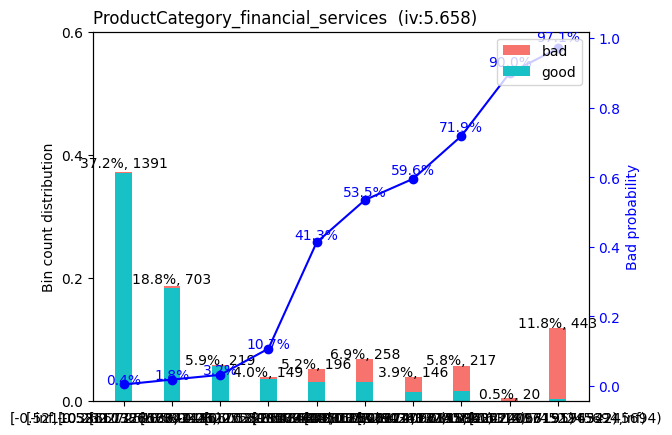

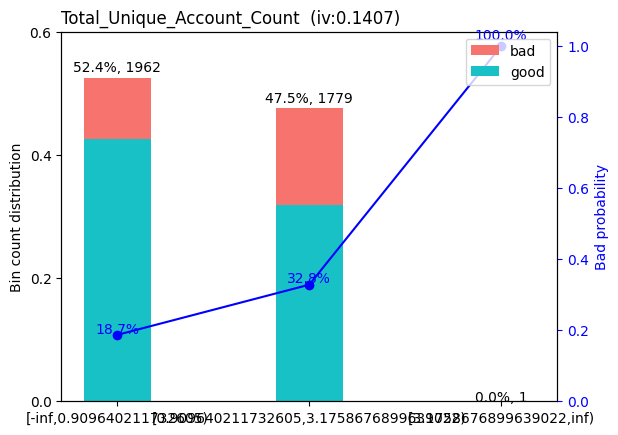

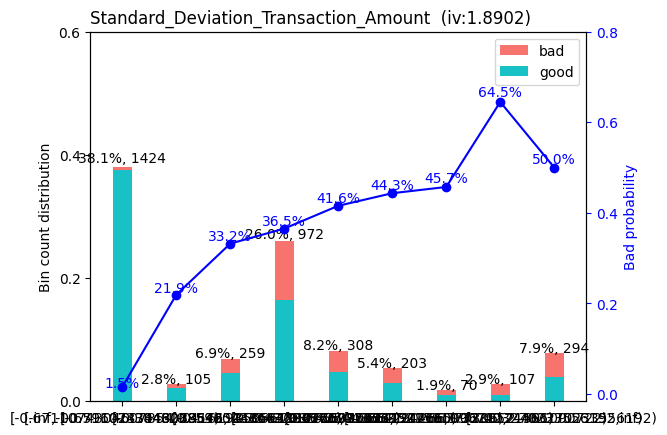

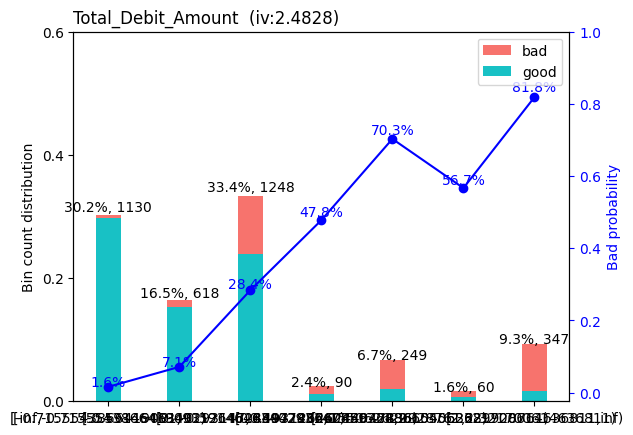

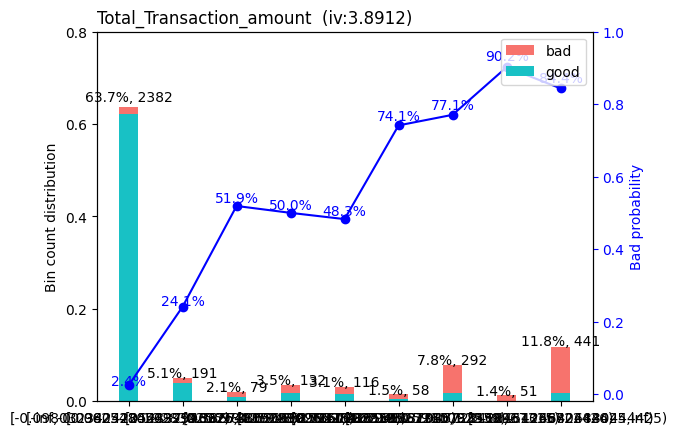

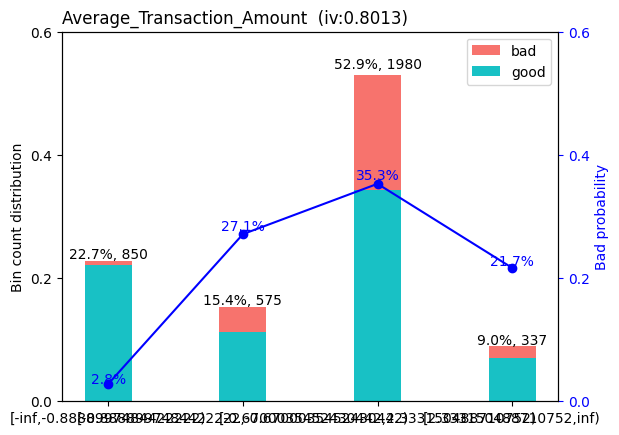

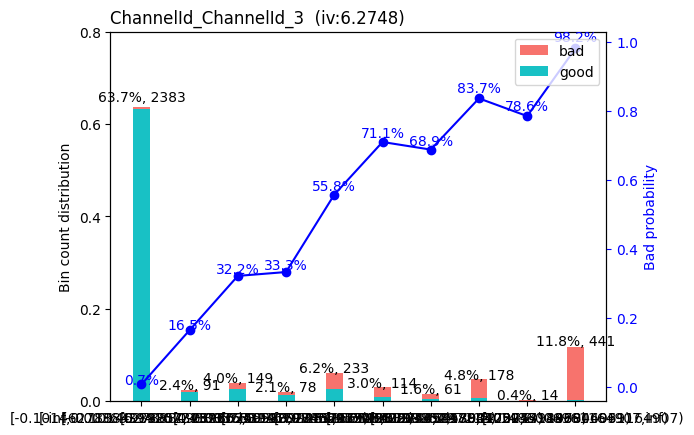

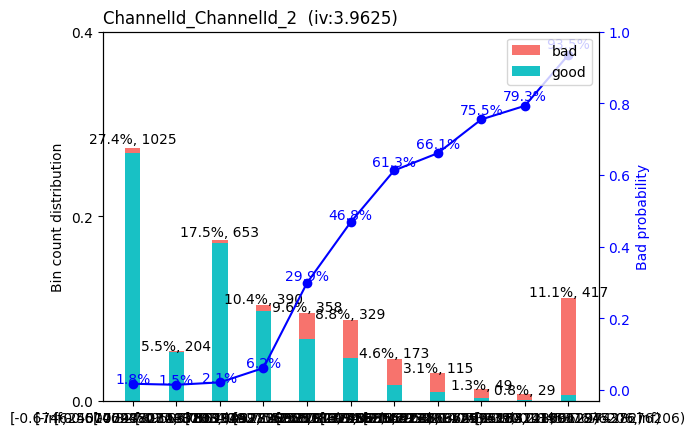

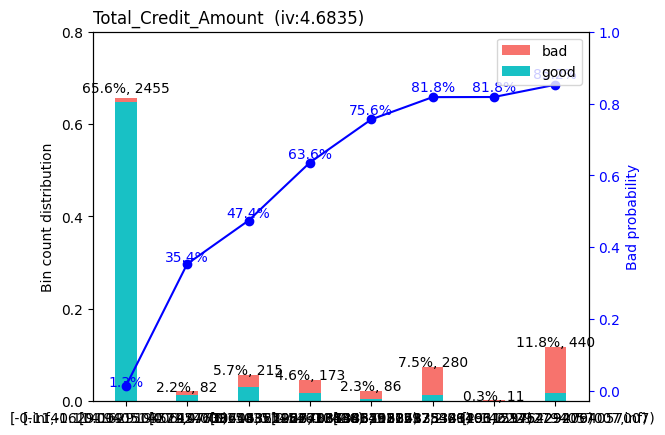

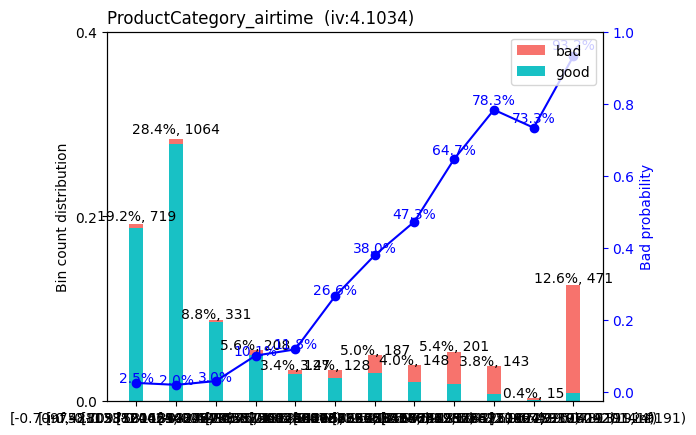

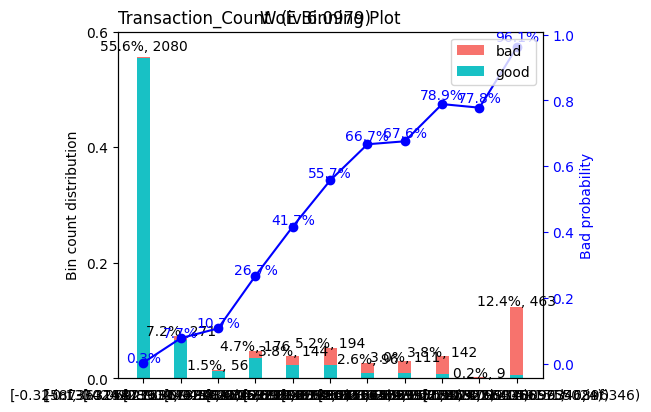

In [9]:
woe.adjust_woe()

##### - The adjust_woe function in your WOEAnalysis class performs two primary tasks: it adjusts the weights of evidence (WoE) calculations based on the previously computed breaks and visualizes these WoE values.
### Interpretation for Total_credit_Amount
1. Distribution: The histogram shows that a significant proportion of observations fall into the first bin, indicating that most customers have a lower total credit amount.
2. Classification Probability: The line plot reveals that as the total credit amount increases, the probability of being classified as "bad" also increases. For instance, in higher bins, the probability of being classified as "bad" reaches around 81.6%, suggesting that higher credit amounts are associated with a higher likelihood of being classified as bad credit risks.
3. Insights on Risk: Categories with higher total credit amounts seem to indicate increased risk. The bin with the highest bad classification percentage (around 11.8%) might warrant attention for risk assessment and management strategies.

In [10]:
train_woe = woe.woeval(df)
train_woe

[INFO] creating woe binning ...
[INFO] converting into woe values ...


,ChannelId_ChannelId_5,FraudResult,ProductCategory_other,CreditRiskLabel,CustomerId,ProductCategory_movies,ProductCategory_transport,ChannelId_ChannelId_1,ProductCategory_tv,ProductCategory_data_bundles,ProductCategory_ticket,ProductCategory_utility_bill,ProductCategory_financial_services_woe,Total_Unique_Account_Count_woe,Standard_Deviation_Transaction_Amount_woe,Total_Debit_Amount_woe,Total_Transaction_amount_woe,Average_Transaction_Amount_woe,ChannelId_ChannelId_3_woe,ChannelId_ChannelId_2_woe,Total_Credit_Amount_woe,ProductCategory_airtime_woe,Transaction_Count_woe
0,0.0,0.0,0.0,Bad,CustomerId_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.366464,-0.393713,-3.079381,0.148823,-2.633192,0.469486,-3.860511,-3.129461,-3.220610,-2.830102,-4.615610
1,0.0,0.0,0.0,Bad,CustomerId_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.366464,-0.393713,-3.079381,0.148823,-2.633192,0.469486,-3.860511,-3.129461,-3.220610,-2.830102,-4.615610
2,0.0,0.0,0.0,Bad,CustomerId_1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.896510,-0.393713,0.522481,0.148823,-2.633192,0.469486,-3.860511,-2.745615,-3.220610,-2.830102,-4.615610
3,0.0,0.0,0.0,Bad,CustomerId_1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.042529,-0.393713,-3.079381,-1.493208,-2.633192,-2.463309,-3.860511,0.947398,-3.220610,-0.935217,-1.401707
4,0.0,0.0,0.0,Bad,CustomerId_1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.896510,0.359554,0.522481,0.148823,-2.633192,0.469486,-3.860511,-2.745615,-3.220610,-2.393624,-4.615610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,0.0,0.0,0.0,Bad,CustomerId_992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.896510,0.359554,0.522481,0.148823,-2.633192,0.469486,-3.860511,-2.745615,-3.220610,-2.393624,-4.615610
3738,0.0,0.0,0.0,Bad,CustomerId_993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.896510,0.359554,0.522481,0.148823,-2.633192,0.469486,-3.860511,-2.745615,-3.220610,-2.830102,-4.615610
3739,0.0,0.0,0.0,Good,CustomerId_994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.574068,-0.393713,1.671752,2.581071,3.294435,0.469486,5.066528,2.418967,2.579309,3.693995,2.327995
3740,0.0,0.0,0.0,Good,CustomerId_996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.014214,0.359554,0.522481,0.148823,2.286640,0.469486,1.308037,-2.745615,2.577128,-2.830102,0.738760


In [11]:
# Merge WoE values with original DataFrame
df_merged = pd.concat([df.reset_index(drop=True), train_woe.reset_index(drop=True)], axis=1)

In [13]:
# Calculate IV for the features
df_merge, iv_results = woe.calculate_iv(df_merged, y='CreditRiskLabel') 
print("Information Value (IV) Results:")
iv_results

Information Value (IV) Results:


,variable,info_value
26,ChannelId_ChannelId_3,6.964996
21,Transaction_Count,6.119629
11,Transaction_Count_woe,6.118273
6,ProductCategory_financial_services,5.811667
10,ChannelId_ChannelId_3_woe,5.807882
3,ProductCategory_financial_services_woe,5.658029
31,Total_Credit_Amount_woe,4.692830
4,ProductCategory_airtime,4.155071
30,ProductCategory_airtime_woe,4.103374
1,ChannelId_ChannelId_2,4.005662


information value (IV):
- IV < 0.02: Not useful for prediction.
- 0.02 ≤ IV < 0.1: Weak predictor.
- 0.1 ≤ IV < 0.3: Medium predictor.
- 0.3 ≤ IV < 0.5: Strong predictor.
- IV ≥ 0.5: Suspicious predictor (may indicate overfitting).

### Feature Predictive Power Summary based on IV

### High Predictive Power (IV > 0.5)

- **ChannelId_ChannelId_3 (6.15)**: Similar to the above but without WoE transformation. Still shows very high predictive power.
- **Transaction_Count (5.55)**: Represents the total number of transactions made by a customer. This feature is highly predictive of the outcome.
- **Transaction_Count_woe (5.50)**: WoE transformation of `Transaction_Count`. Similarly highly predictive.
- **ProductCategory_financial_services_woe (4.58)**: WoE-transformed version of the `ProductCategory_financial_services`, a category likely related to financial transactions.
- **ProductCategory_financial_services (4.49)**: The non-transformed version of `ProductCategory_financial_services`, also showing high predictive power.

### Medium Predictive Power (0.1 < IV <= 0.5)

- **Total_Credit_Amount_woe (4.34)**: The WoE-transformed value of total credit amount, indicating medium to high predictive power.
- **Total_Credit_Amount (3.90)**: The non-transformed version of the total credit amount, still highly predictive.
- **Total_Transaction_amount_woe (3.69)**: WoE-transformed total transaction amount. This shows good predictive ability.
- **ProductCategory_airtime (3.14)**: Refers to transactions involving airtime purchases, showing predictive ability for credit risk.
- **ChannelId_ChannelId_2_woe (2.91)**: WoE-transformed Channel 2 transactions, indicating predictive relevance.
- **Standard_Deviation_Transaction_Amount_woe (2.91)**: WoE-transformed standard deviation of transaction amounts, signifying the variability in transaction amounts is a useful predictor.
- **ChannelId_ChannelId_2 (2.90)**: Non-transformed version of Channel 2 transactions.
- **ProductCategory_airtime_woe (2.76)**: WoE-transformed version of airtime transactions, showing predictive power.
- **Total_Transaction_amount (2.66)**: Non-transformed total transaction amount, moderately predictive.
- **Total_Debit_Amount_woe (2.28)**: WoE-transformed debit amount, showing some predictive ability.
- **Total_Debit_Amount (1.68)**: Non-transformed version of total debit amount.
- **Standard_Deviation_Transaction_Amount (1.67)**: Non-transformed standard deviation of transaction amounts.
- **Average_Transaction_Amount (1.64)**: The average value of transactions, indicating its usefulness in predicting outcomes.
- **Total_Unique_Account_Count (1.53)**: Represents the number of unique accounts a customer has interacted with, showing moderate predictive power.
- **Average_Transaction_Amount_woe (1.20)**: WoE-transformed version of average transaction amount.
- **Total_Unique_Account_Count_woe (0.47)**: WoE-transformed version of unique account count.

### No Predictive Power (IV = 0)

The following variables show no predictive power, indicating that they do not contribute significantly to the model’s prediction. These attributes will be removed from the dataset:

- **ProductCategory_ticket**
- **FraudResult**
- **ProductCategory_transport**
- **ChannelId_ChannelId_1**
- **ChannelId_ChannelId_5**
- **ProductCategory_movies**
- **ProductCategory_other**
- **ProductCategory_tv**
- **ProductCategory_utility_bill**
- **ProductCategory_data_bundles**


In [14]:
df_merge = df_merge.drop([
    'ProductCategory_ticket', 
    'FraudResult', 
    'ProductCategory_transport', 
    'ChannelId_ChannelId_1', 
    'ChannelId_ChannelId_5', 
    'ProductCategory_movies', 
    'ProductCategory_other', 
    'ProductCategory_tv', 
    'ProductCategory_utility_bill', 
    'ProductCategory_data_bundles'
], axis=1)

In [15]:
df_merge

,CustomerId,Total_Credit_Amount,Total_Debit_Amount,Total_Transaction_amount,Average_Transaction_Amount,Transaction_Count,Total_Unique_Account_Count,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ProductCategory_airtime,ProductCategory_financial_services,Standard_Deviation_Transaction_Amount,CreditRiskLabel,ProductCategory_financial_services_woe,Total_Unique_Account_Count_woe,Standard_Deviation_Transaction_Amount_woe,Total_Debit_Amount_woe,Total_Transaction_amount_woe,Average_Transaction_Amount_woe,ChannelId_ChannelId_3_woe,ChannelId_ChannelId_2_woe,Total_Credit_Amount_woe,ProductCategory_airtime_woe,Transaction_Count_woe
0,CustomerId_1,-0.826640,0.377591,-0.728235,1.043121,-0.839070,-1.356587,-0.674625,-0.884094,-0.709758,-0.909351,-0.960924,0,-4.366464,-0.393713,-3.079381,0.148823,-2.633192,0.469486,-3.860511,-3.129461,-3.220610,-2.830102,-4.615610
1,CustomerId_10,-0.826640,0.377591,-0.728235,1.043121,-0.839070,-1.356587,-0.674625,-0.884094,-0.709758,-0.909351,-0.960924,0,-4.366464,-0.393713,-3.079381,0.148823,-2.633192,0.469486,-3.860511,-3.129461,-3.220610,-2.830102,-4.615610
2,CustomerId_1001,-0.481362,-0.155651,-0.481001,0.200178,-0.582472,-0.223474,-0.501010,-0.590607,-0.568906,-0.521104,0.363661,0,-2.896510,-0.393713,0.522481,0.148823,-2.633192,0.469486,-3.860511,-2.745615,-3.220610,-2.830102,-4.615610
3,CustomerId_1002,-0.764983,-0.702779,-0.791558,-1.013899,-0.197574,-0.223474,0.193449,-0.394949,-0.146348,-0.132857,-0.840260,0,-1.042529,-0.393713,-3.079381,-1.493208,-2.633192,-2.463309,-3.860511,0.947398,-3.220610,-0.935217,-1.401707
4,CustomerId_1003,-0.470401,-0.066777,-0.461611,0.039617,-0.518322,0.909640,-0.501010,-0.492778,-0.428053,-0.521104,0.282046,0,-2.896510,0.359554,0.522481,0.148823,-2.633192,0.469486,-3.860511,-2.745615,-3.220610,-2.393624,-4.615610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,-0.470401,-0.066777,-0.461611,0.039617,-0.518322,0.909640,-0.501010,-0.492778,-0.428053,-0.521104,0.293952,0,-2.896510,0.359554,0.522481,0.148823,-2.633192,0.469486,-3.860511,-2.745615,-3.220610,-2.393624,-4.615610
3738,CustomerId_993,-0.470401,-0.066777,-0.461611,0.268989,-0.582472,0.909640,-0.501010,-0.590607,-0.568906,-0.521104,0.401305,0,-2.896510,0.359554,0.522481,0.148823,-2.633192,0.469486,-3.860511,-2.745615,-3.220610,-2.830102,-4.615610
3739,CustomerId_994,2.146229,2.321701,2.124643,0.200171,2.111810,-0.223474,2.190018,2.148601,2.107292,2.131917,2.364292,1,4.574068,-0.393713,1.671752,2.581071,3.294435,0.469486,5.066528,2.418967,2.579309,3.693995,2.327995
3740,CustomerId_996,1.160074,-0.066777,0.980583,0.802786,0.187323,0.909640,-0.501010,0.583339,-0.568906,1.031884,0.010178,1,2.014214,0.359554,0.522481,0.148823,2.286640,0.469486,1.308037,-2.745615,2.577128,-2.830102,0.738760


##### Save the last data for model devlopment 

In [16]:
import pandas as pd
df_merge.to_csv('../Data/data_v3.csv')